# Experiment type

In [28]:
loc = "sgd_runs_vsize_fix"
#loc = "sgd_runs"

## Feature importance

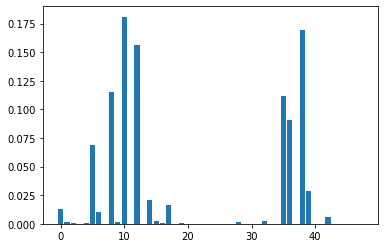

In [29]:
## Ver feature importance usando arvore de decisao
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

experiment = 1
folder = '{}/{}/dataset/data_party{}.npz' 
x_train = []
y_train = []
x_test = []
y_test = []
for experiment in range(1, 11):
    for j in range(0, 3):
        data = np.load(folder.format(loc, experiment,j))
        x_train += [ data['x_train'] ]
        y_train += [ data['y_train'] ]
        x_test +=  [ data['x_test'] ]
        y_test += [ data['y_test'] ]

x_train = [item for sublist in x_train for item in sublist]
x_test = [item for sublist in x_test for item in sublist]
y_train = [item for sublist in y_train for item in sublist]
y_test = [item for sublist in y_test for item in sublist]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
plt.bar([x for x in range(len(clf.feature_importances_))], clf.feature_importances_)
plt.show()
## tSNE visual -> so interpretativo, visual

## tSNE

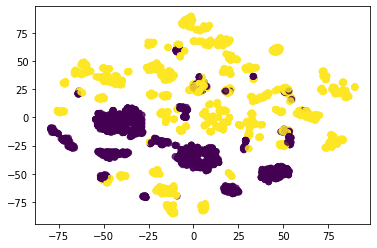

In [31]:
# Visualize dataset in lower dimension
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE().fit_transform(x_train)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_train, alpha=0.8)
plt.show()

# Modelos centralizados

## SGD Classifier

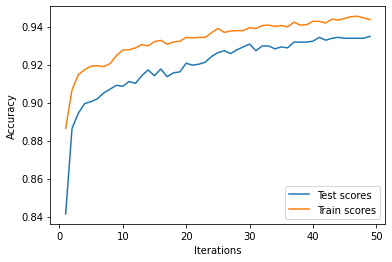

In [84]:
# SGD evalution
# All examples classified as normal events. Imbalance not treated.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import TruncatedSVD
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import f1_score

# Preprocessing steps
import numpy as np
from sklearn.preprocessing import StandardScaler
folder = '{}/{}/dataset/data_party{}.npz' 

# Loading all data that should be for each party


results_experiments = {}
results_experiments['train'] = []
results_experiments['test'] = []

for experiment in range(1,11):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for j in range(0, 3):
        data = np.load(folder.format(loc, experiment,j))
        x_train += [ data['x_train'] ]
        y_train += [ data['y_train'] ]
        x_test +=  [ data['x_test'] ]
        y_test += [ data['y_test'] ]

    x_train = [item for sublist in x_train for item in sublist]
    x_test = [item for sublist in x_test for item in sublist]
    y_train = [item for sublist in y_train for item in sublist]
    y_test = [item for sublist in y_test for item in sublist]

    # Data was already scaled after being divided for each node
    #transformer = StandardScaler()
    #transformer.fit(x_train)
    #x_train = transformer.transform(x_train)
    #x_test = transformer.transform(x_test)


    max_epochs = 50
    train_scores = []
    test_scores = []
    epochs = [x for x in range(1, max_epochs)]

    classifier = SGDClassifier(loss='log', warm_start=True, max_iter=1, random_state=42, eta0=0.01, learning_rate='adaptive', tol=1e-3)
    for i in range(1, max_epochs):
        x_train, y_train = shuffle(x_train, y_train)
        classifier.partial_fit(x_train, y_train, classes=np.unique(y_train))
        # f1
        #train_scores += [ f1_score(y_train, classifier.predict(x_train)) ] 
        #test_scores += [ f1_score(y_test, classifier.predict(x_test)) ] 
        # accuracy
        train_scores += [ classifier.score(x_train, y_train)]
        test_scores += [ classifier.score(x_test, y_test)]
    results_experiments['train'] += [ train_scores ]
    results_experiments['test'] += [ test_scores ]

train_scores = np.array(results_experiments['train']).sum(axis=0)/10
test_scores = np.array( results_experiments['test']).sum(axis=0)/10

import matplotlib.pyplot as plt
plt.plot(epochs, test_scores, label = "Test scores")
plt.plot(epochs, train_scores, label = "Train scores")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('{}_acc_centralized.png'.format(loc), facecolor=(1, 1, 1))
plt.show()


centralized_scores = {}
centralized_scores['train'] = train_scores
centralized_scores['test'] = test_scores



# Treinamento individualizado

# SGD Classifier

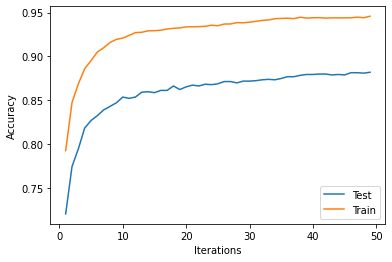

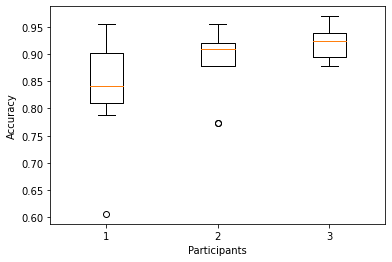

In [85]:
# SGD evalution
# All examples classified as normal events. Imbalance not treated.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import TruncatedSVD
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import f1_score

# Preprocessing steps
import numpy as np
from sklearn.preprocessing import StandardScaler

folder = '{}/{}/dataset/data_party{}.npz' 

train_scores = []
test_scores = []
for experiment in range(1,11):
    for j in [0, 1, 2]:
        data = np.load(folder.format(loc,experiment,j))
        x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

        transformer = StandardScaler()
        transformer.fit(x_train)
        x_train = transformer.transform(x_train)
        x_test = transformer.transform(x_test)

        max_epochs = 50
        tmp_train_scores = []
        tmp_test_scores = []
        epochs = [x for x in range(1, max_epochs)]

        classifier = SGDClassifier(loss='log', warm_start=True, max_iter=1, random_state=42, eta0=0.01, learning_rate='adaptive', tol=1e-3)
        for i in range(1, max_epochs):
            x_train, y_train = shuffle(x_train, y_train)
            classifier.partial_fit(x_train, y_train, classes=np.unique(y_train))
            # f1 score
            #train_scores += [ f1_score(y_train, classifier.predict(x_train)) ] 
            #test_scores += [ f1_score(y_test, classifier.predict(x_test)) ] 
            # accuracy
            tmp_train_scores += [ classifier.score(x_train, y_train)]
            tmp_test_scores += [ classifier.score(x_test, y_test)]
        train_scores += [ tmp_train_scores ]
        test_scores += [ tmp_test_scores ]
    

participants = 3
participants_score_dist = {'0': [], '1': [], '2': []}

# Only using the test score from the last iteration
for i in range(0, 28, participants):
    participants_score_dist['0'] += [ test_scores[i + 0][-1] ]
    participants_score_dist['1'] += [ test_scores[i + 1][-1] ]
    participants_score_dist['2'] += [ test_scores[i + 2][-1] ]

train_scores = np.array(train_scores).sum(axis=0)/30
test_scores = np.array(test_scores).sum(axis=0)/30
    
import matplotlib.pyplot as plt
plt.plot(epochs, test_scores, label = "Test")
plt.plot(epochs, train_scores, label = "Train")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('{}_acc_individual.png'.format(loc), facecolor=(1, 1, 1))
plt.show()

box_plot_data = [participants_score_dist['0'],participants_score_dist['1'],participants_score_dist['2']]
plt.boxplot(box_plot_data)
plt.xlabel("Participants")
plt.ylabel("Accuracy")
plt.show()


# Rodando varias e varias vezes, resultados no teste nunca passam de f1 0.88
individual_learning = test_scores

# Federated learning

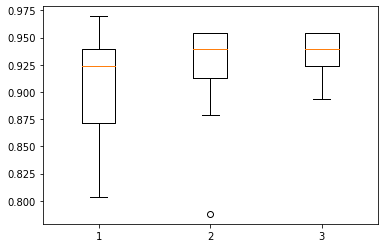

In [86]:
## 3 participants
import glob
import json
import os

folder = '{}/{}/{}' 
# list files with pattern
train_info = []
test_info = []

## Attention, these indexes must be reordered in the boxplot. Files are loaded 112, 282, 45 samples. Be careful in the boxplot comparisong.
for experiment in range(1,11):
    for file in glob.glob(folder.format(loc,experiment,'train_*')):
        with open(file, 'r') as test:
            res = test.read()
            res = res.replace("'",'"')
            train_info += [ json.loads(res) ]

    for file in glob.glob(folder.format(loc,experiment,'test_*')):
        with open(file, 'r') as test:
            res = test.read()
            res = res.replace("'",'"')
            test_info += [ json.loads(res) ]
            
participants = 3
federated_score_dist = {'0': [], '1': [], '2': []}

# Only using the test score from the last iteration
for i in range(0, 28, participants):
    federated_score_dist['0'] += [ test_info[i + 0][-1]['acc'] ]
    federated_score_dist['1'] += [ test_info[i + 1][-1]['acc'] ]
    federated_score_dist['2'] += [ test_info[i + 2][-1]['acc'] ]
    
box_plot_data = [federated_score_dist['2'],federated_score_dist['0'],federated_score_dist['1']]
plt.boxplot(box_plot_data)
plt.show()

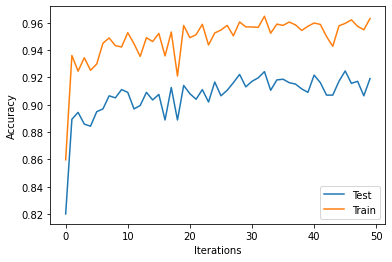

In [87]:
import matplotlib.pyplot as plt
import numpy as np

train_scores = []
test_scores = []
for i in range(len(test_info)):
    train_scores += [[ x['acc'] for x in train_info[i]]]
    test_scores += [[ x['acc'] for x in test_info[i]]]
    
# Aqui preciso fazer a mesma coisa para gerar o barplot

train_scores = np.array(train_scores).sum(axis=0)/30
test_scores = np.array(test_scores).sum(axis=0)/30
    
plt.plot(range(len(test_scores)), test_scores, label = "Test")
plt.plot(range(len(train_scores)), train_scores, label = "Train")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
        
federated_scores = {}
federated_scores['train'] = train_scores
federated_scores['test'] = test_scores

# Comparação treinamento individual vs federado

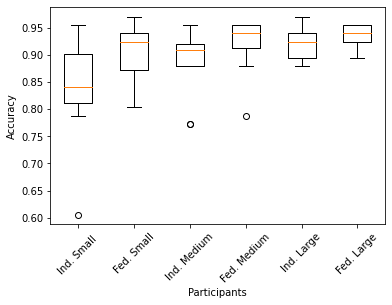

In [95]:
# Atencao: Nao usar a comparacao abaixo para o experimento com participantes de mesmo tamanho sgd_runs, porque nao sabemos o mapeamento do train_data0, train_data1, train_data2 para o caso federado.
box_plot_data = [participants_score_dist['0'],federated_score_dist['2'],participants_score_dist['1'],federated_score_dist['0'],participants_score_dist['2'],federated_score_dist['1']]
plt.boxplot(box_plot_data, labels = ['Ind. Small ', 'Fed. Small', 'Ind. Medium', 'Fed. Medium', 'Ind. Large', 'Fed. Large'])
plt.xticks(rotation=45) 
plt.xlabel("Participants")
plt.ylabel("Accuracy")
plt.savefig('{}_acc_boxplot_comparison.png'.format(loc), facecolor=(1, 1, 1), bbox_inches='tight')
plt.show()

# Interpretação dos resultados para treinamento individualizado vs federado
# Para todos os tamanhos de participante, o treinamento federado reduziu a variabilidade de performance
# Apresentando scores maximos e minimos maiores que as versões centralizadas
# Assim como em outros experimentos, a melhora de performance foi mais acentuada para o menor participante
# Apesar disso, até mesmo o participante maior pode se beneficiar do compartilhamento de info dos participantes menores.

# Comparação SGD centralizado vs federado

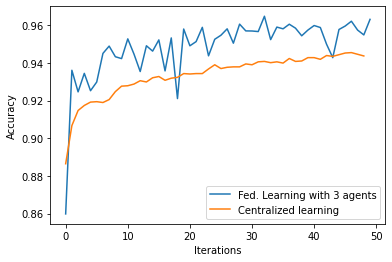

In [89]:
plt.plot(range(len(federated_scores['train'])), federated_scores['train'], label = "Fed. Learning with 3 agents")
plt.plot(range(len(centralized_scores['train'])), centralized_scores['train'], label = "Centralized learning")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

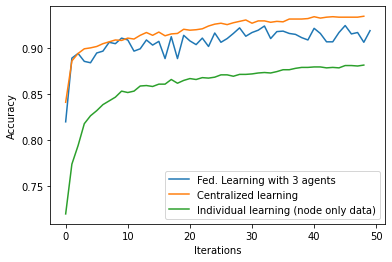

In [90]:
plt.plot(range(len(federated_scores['test'])), federated_scores['test'], label = "Fed. Learning with 3 agents")
plt.plot(range(len(centralized_scores['test'])), centralized_scores['test'], label = "Centralized learning")
plt.plot(range(len(individual_learning)), individual_learning, label = "Individual learning (node only data)")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('{}_acc_comparison.png'.format(loc), facecolor=(1, 1, 1))
plt.show()